# Part 9 - Predicting Review Classifications

## Tasks
For this part of the project, you will using machine learning and deep NLP to classify the reviews.
### Repo Prep


- Create a `"Models/"` folder in your project repository, with the following sub-folders: 
    - `"Models/ml/"`. You will save your sklearn model pipelines here for later use in deployment.
    - `"Models/nn/"`. You will save your tensorflow models here for later use in deployment.
- Add new subfolders to your "Data-NLP/"" folder.
    - Specifically, create:
        - `"Data-NLP/ml/"` folder. We will save your training and test data (X_train,y_train) for later use in deployment.
        - `"Data-NLP/nn/"` folder.  We will save your training and test Tensorflow datasets for later use in deployment.
     

    
- Create a new notebook for Part 6 - Review Classification for this part of the project. 

### Load the Data

- Load the joblib containing the dataframe from Part 5 of the project.
- Use the original review column as X and the classiifcation target (High/Low Rating Reviews) as y.

___

## Machine Learning
For this project, you will use modeling pipelines with the text vectorizer and model in the same pipeline. This will make it very easy to use save and load the models to use in a deployed application.


### Create a Text Vectorizer
- Select an sklearn vectorizer to for your task.
    - Remember to consider your preprocessing choices like using stopwords, using ngrams, etc.

### Build a Machine Learning Model

- Build an sklearn modeling pipeline with a text vectorizer and a classification model.
    - Suggested Models: MultinomialNB, LogisticRegression, RandomForestClassifier 

- Fit and evaluate the model using the machine learning classification models from sklearn.
    - In a Markdown cell, document your observations from your results. (e.g. how good is the model overall? Is it particularly good/bad at predicting one class?)


### GridSearch Text Vectorization 
Attempt to improve on yourm model by tuning the text preprocessing steps. 

- Construct a grid of parameters for the text vectorization step. Consider trying:
    - CountVectorizer/TfidfVectorizer
    - stopwords
    - ngram_range
    - min_df/max_df

- Fit and evaluate the gridsearch results:
    - What were the best parameters?
    - How does the best estimator perform when evaluated on the training and test data?
 

### Save the Best Model and Train/Test Data  as Joblibs

- Save your overall best model pipeline as the only variable in a .joblib file in your new Models/ folder. (e.g. "Models/ml/best-clf-logreg.joblib")

- Save a list containing `[X_train, y_train]` as `"Data-NLP/ml/train-data.joblib"`
- Save a list containing `[X_test,y_test]`  as `"Data-NLP/ml/test-data.joblib"`


____

## Deep NLP (RNNs)
For this part of the project, you will use a Keras TextVectorization layer as part of your RNN model. This serves the same purpose as using the sklearn pipeline: it bundles text preparation into the model itself, making it deployment-ready.

 
###  Create train/test/val datasets
- Convert the target categories to integers (e.g. Using sklearn's LabelEncoder) 
- Create a tensorflow dataset using the X and  (integer version) of y.
- Split the dataset into a training, test, and validation datasets.

### Create a Keras Text Vectorization layer
- Create a keras text vectorization layer to use in an RNN (sequence) model.
- Fit/Adapt the text vectorization layer on the training texts.
- Save the vocabulary size from layer to use in your models' Embedding layer.


### Build an RNN with the TextVectorization Layer
- Build and fit at least 1 sequence model (LSTM, GRU, Bidirectional, etc)
- Evalaute the model on the training and trest data.
    - In a Markdown cell, document your observations from your results. (e.g. How did the RNN compare to your ML model? Was it superior to your ML model in some way (e.g. accuracy, recall, etc.)


### Save your best RNN model and Tensforflow Datasets

- Save your best neural network in a subfolder inside your `"Models/nn/` folder. (e.g. "Models/nn/lstm/")
    - Reminder: use safe_format='tf' to save the model in a folder of repo-friendly files. 

- Save your training and test Tensorflow dataset objects in "Data/nn/":
    - Save your training dataset object as `"Data-NLP/nn/train/"`
    - Save your test dataset object  as `"Data-NLP/nn/test/"`"



### 


# Solution

In [36]:
## Run code to get reproducible results BEFORE anything else
import tensorflow as tf
import numpy as np

# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Source: https://discuss.tensorflow.org/t/upgrading-os-to-sonoma-on-my-mac-causing-tensorflow-errors/19846/5
tf.config.set_visible_devices([], 'GPU')

In [37]:
%load_ext autoreload
%autoreload 2

import project_functions as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import joblib

## Making New Folders 
# dirs = ["Data/",'Data/ml/',"Models/","Models/keras/"]
# for folder in dirs:
#     os.makedirs(folder, exist_ok=True)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from sklearn import set_config
set_config(transform_output='pandas')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import (CountVectorizer,TfidfTransformer, 
                                             TfidfVectorizer,ENGLISH_STOP_WORDS)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import nltk 
from nltk import TweetTokenizer, word_tokenize,wordpunct_tokenize
import string
from wordcloud import WordCloud



from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## #NOT THE MOST RECENT VERSIONS!!!!
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [40]:
fname_data_joblib = "Data/processed-nlp-data.joblib"
df = joblib.load(fname_data_joblib)
df

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas,tokens-joined,lemmas-joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,<NA>,"[fine, piece, cinema, wong, kar, wai, tells, s...","[fine, piece, cinema, wong, kar, wai, tell, st...",fine piece cinema wong kar wai tells story peo...,fine piece cinema wong kar wai tell story peop...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High,"[guilty, pleasure, personally, love, great, es...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...,guilty pleasure personally love great escape w...
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,<NA>,"[roommate, hates, stop, motion, animation, wat...","[roommate, hate, stop, motion, animation, watc...",roommate hates stop motion animation watched 2...,roommate hate stop motion animation watch 2018...
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,<NA>,"[good, stop, motion, animation, <, em>'chicken...","[good, stop, motion, animation, <, em>'chicken...",good stop motion animation < em>'chicken run'<...,good stop motion animation < em>'chicken run'<...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,<NA>,"[ok, huge, temptation, riddle, review, puns, g...","[ok, huge, temptation, riddle, review, pun, go...",ok huge temptation riddle review puns going cr...,ok huge temptation riddle review pun go crack ...
...,...,...,...,...,...,...,...,...,...,...,...
8645,64ba5c5706f98400e1169ed0,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,"I'm not really a great fan of Tom Cruise. Yes,...",7.0,<NA>,"[great, fan, tom, cruise, yes, stunts, fit, fi...","[great, fan, tom, cruise, yes, stunt, fit, fid...",great fan tom cruise yes stunts fit fiddle act...,great fan tom cruise yes stunt fit fiddle acto...
8646,64bdab4dad50f0013b127c02,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,Spectacular cinematic action let down by an in...,6.0,<NA>,"[spectacular, cinematic, action, let, incohere...","[spectacular, cinematic, action, let, incohere...",spectacular cinematic action let incoherent st...,spectacular cinematic action let incoherent st...
8647,64cca28c43cd5400add62db6,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,The Tom Cruise “Mission Impossible” franchise ...,9.0,High,"[tom, cruise, mission, impossible, franchise, ...","[tom, cruise, mission, impossible, franchise, ...",tom cruise mission impossible franchise reliab...,tom cruise mission impossible franchise reliab...
8648,652e4978caef2d0139df3b6c,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,It was a good movie. Not better than the pervi...,8.0,<NA>,"[good, movie, better, pervious, loved]","[good, movie, well, pervious, love]",good movie better pervious loved,good movie well pervious love


In [41]:
# Dropping Reviews not in target ratings
df_ml = df.dropna(subset=['target'])
df_ml

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas,tokens-joined,lemmas-joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High,"[guilty, pleasure, personally, love, great, es...","[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...,guilty pleasure personally love great escape w...
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,Low,"[underwhelmed, straight, bored, course, seeing...","[underwhelme, straight, bore, course, see, hun...",underwhelmed straight bored course seeing hunt...,underwhelme straight bore course see hunt clim...
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,Low,"[entertainign, mission, impossible, second, in...","[entertainign, mission, impossible, second, in...",entertainign mission impossible second install...,entertainign mission impossible second install...
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,High,"[okay, admit, bit, easy, grader, comes, romant...","[okay, admit, bit, easy, grader, come, romanti...",okay admit bit easy grader comes romantic come...,okay admit bit easy grader come romantic comed...
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,Low,"[scream, 3, lackluster, screenplay, unimaginat...","[scream, 3, lackluster, screenplay, unimaginat...",scream 3 lackluster screenplay unimaginative k...,scream 3 lackluster screenplay unimaginative k...
...,...,...,...,...,...,...,...,...,...,...,...
8629,6499e4de62f3350127477b22,569094,tt9362722,Spider-Man: Across the Spider-Verse,"I don't know, but in my humble opinion, the pu...",10.0,High,"[know, humble, opinion, punk, spider, man, nee...","[know, humble, opinion, punk, spider, man, nee...",know humble opinion punk spider man needed loo...,know humble opinion punk spider man need look ...
8631,64cca1752f266b09ef121de5,569094,tt9362722,Spider-Man: Across the Spider-Verse,I don’t have that much to say about “Spider-Ma...,9.0,High,"[spider, man, spider, verse, sequel, equally, ...","[spider, man, spider, verse, sequel, equally, ...",spider man spider verse sequel equally terrifi...,spider man spider verse sequel equally terrifi...
8632,64de022bd100b614b2ef6547,569094,tt9362722,Spider-Man: Across the Spider-Verse,Incredible non stop action movie,10.0,High,"[incredible, non, stop, action, movie]","[incredible, non, stop, action, movie]",incredible non stop action movie,incredible non stop action movie
8639,6529c2000929f6010090f513,565770,tt9362930,Blue Beetle,"I mean, it's not bad. It has the message, but...",10.0,High,"[mean, bad, message, screamed, lungs, like, mo...","[mean, bad, message, scream, lung, like, movie...",mean bad message screamed lungs like movies da...,mean bad message scream lung like movie day fa...


In [42]:
df_ml['target'].value_counts(1)

Low     0.505573
High    0.494427
Name: target, dtype: float64

In [43]:
X = df_ml['review']
y = df_ml['target']

In [44]:
# Disable parser and ner
# nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)
X_train.head()

3416    Let me make it clear from the beginning, I do ...
6214    Horrible.\r\n\r\n"If humans didn't kill monste...
3196    kind of a dumb movie. he has the ability to ti...
7618    **Take That 👊 💥 DELTA-21 . . . . . .  Marvel S...
5521    Damien Chazelle has already proven himself to ...
Name: review, dtype: object

In [46]:
vectorizer = CountVectorizer(stop_words=None,
    ngram_range=(1,1))

clf_bayes = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',MultinomialNB())
])
vectorizer.fit(X_train)

CountVectorizer()

In [47]:
# Saves vocab - matches number of columns above
vocab_dict = vectorizer.vocabulary_
len(vocab_dict)

22362

In [48]:
# Words are now the feature_names
feature_names = vectorizer.get_feature_names_out()
len(feature_names)

22362

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       828
         Low       1.00      1.00      1.00       854

    accuracy                           1.00      1682
   macro avg       1.00      1.00      1.00      1682
weighted avg       1.00      1.00      1.00      1682



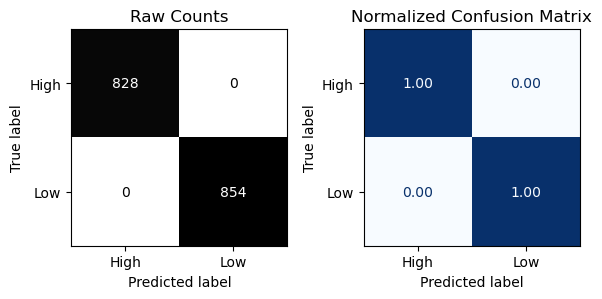


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.87      0.83      0.85       281
         Low       0.84      0.88      0.86       280

    accuracy                           0.85       561
   macro avg       0.85      0.85      0.85       561
weighted avg       0.85      0.85      0.85       561



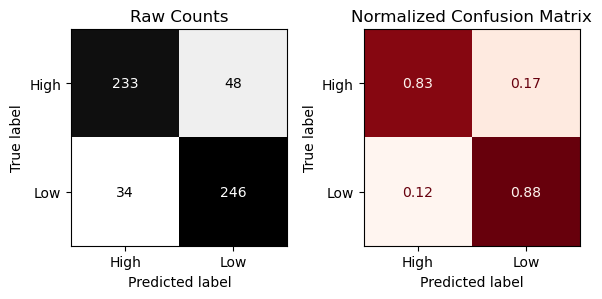

In [49]:
vectorizer = CountVectorizer(stop_words=None,
    ngram_range=(1,1))

clf_logreg = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',LogisticRegression(C=1e12))
])

## Fit an evaluate a Logistic Regression
clf_logreg.fit(X_train, y_train)
fn.evaluate_classification(clf_logreg, X_train,y_train, X_test, y_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.99      0.97      0.98       828
         Low       0.97      0.99      0.98       854

    accuracy                           0.98      1682
   macro avg       0.98      0.98      0.98      1682
weighted avg       0.98      0.98      0.98      1682



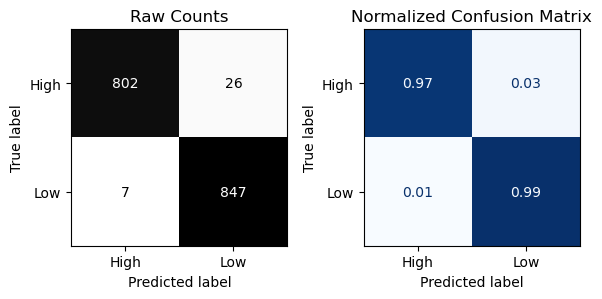


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.91      0.80      0.85       281
         Low       0.82      0.92      0.87       280

    accuracy                           0.86       561
   macro avg       0.86      0.86      0.86       561
weighted avg       0.86      0.86      0.86       561



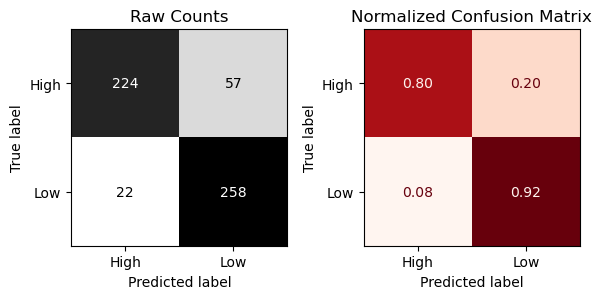

In [50]:
## Fit an evaluate a Naive Bayes Classifier
clf_bayes.fit(X_train, y_train)
fn.evaluate_classification(clf_bayes, X_train,y_train, X_test, y_test)

## GridSearching ML Models/Prep

In [51]:
# # Define params to try for both vectorizers
# # param_grid_clf = {'clf__C': [1e12,1e10]}

# param_grid_shared = {
#     "vectorizer__max_df": [0.7, 0.8, 0.9],
#     'vectorizer__min_df': [ 2, 3, 4 ], 
#     # "vectorizer__max_features": [None, 1000, 2000],
#     "vectorizer__stop_words": [None,'english']
# }

# # Setting params for the count vectorizer
# param_grid_count = {
#     'vectorizer':[CountVectorizer()],
#     **param_grid_shared
# }


# # Setting params for tfidf vectorizer 
# param_grid_tfidf = {
#     'vectorizer': [TfidfVectorizer()],
#     "vectorizer__norm": ["l1", "l2"],
#     "vectorizer__use_idf": [True, False],
#     **param_grid_shared
# }

# # combine into list of params
# params_combined = [param_grid_count, param_grid_tfidf]
# params_combined

In [52]:
# # logreg_pipe = Pipeline([
# #     ('vectorizer',TfidfVectorizer()),
# #     ('clf',LogisticRegression(max_iter=500))
# # ])

# logreg_pipe = Pipeline([
#     ('vectorizer',CountVectorizer()),
#     ('clf',MultinomialNB())
# ])


In [53]:
# %%time
# # Create grid search
# grid_search = GridSearchCV(logreg_pipe, params_combined, scoring='recall_macro',cv=3, verbose=1, n_jobs=-1)
    
    
# # Fit the model
# grid_search.fit(X_train, y_train)


In [54]:
# grid_search.best_params_


In [55]:
# # Now define the best version of the model
# best_model = grid_search.best_estimator_

# # Predict and Evaluate with the custom function
# fn.evaluate_classification(best_model, X_train, y_train, X_test, y_test)


## GS from LP

In [56]:
# param_grid_shared = {
#     "vectorizer__max_df": [0.7, 0.8, 0.9],
#     'vectorizer__min_df': [ 2, 3, 4 ], 
#     # "vectorizer__max_features": [None, 1000, 2000],
#     "vectorizer__stop_words": [None,'english']
# }

# # Setting params for the count vectorizer
# param_grid_count = {
#     'vectorizer':[CountVectorizer()],
#     **param_grid_shared
# }


# # Setting params for tfidf vectorizer 
# param_grid_tfidf = {
#     'vectorizer': [TfidfVectorizer()],
#     "vectorizer__norm": ["l1", "l2"],
#     "vectorizer__use_idf": [True, False],
#     **param_grid_shared
# }


# # Define parameters to tune multiple models

# param_grid_RF = {
#     'clf' : [RandomForestClassifier(random_state = 42)],
#     'clf__max_depth' : [5, None],
#     'clf__min_samples_leaf' : [1, 2],
# }

# param_grid_MNB = {
#     'clf' : [MultinomialNB()],
#     'clf__alpha' : [.5, 1],
# }

# param_grid_logreg = {
#     'clf': [LogisticRegression(random_state = 42)],
#     'clf__C' : [.1, 1, 10, 100],
# }

# # combine into list of params
# model_params_combined = [param_grid_RF, param_grid_MNB, param_grid_logreg]




In [57]:
# Set up Pipeline to allow GridSearching different vectorizers
vect_pipe = Pipeline([('vectorizer', CountVectorizer()), # This is just a placeholder
                     ('clf',MultinomialNB())])



In [58]:
# Define params to try for both vectorizers
param_grid_shared = {
    "vectorizer__max_df": [0.7, 0.8, 0.9],
    'vectorizer__min_df': [ 2, 3, 4 ], 
    "vectorizer__max_features": [None, 1000, 2000],
    "vectorizer__stop_words": [None,'english']
}

# Setting params for the count vectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid_shared
}


# Setting params for tfidf vectorizer 
param_grid_tfidf = {
    'vectorizer': [TfidfVectorizer()],
    "vectorizer__norm": ["l1", "l2"],
    "vectorizer__use_idf": [True, False],
    **param_grid_shared
}

# combine into list of params
vect_params_combined = [param_grid_count, param_grid_tfidf]



In [59]:
# Define parameters to tune multiple models

# param_grid_RF = {
#     'clf' : [RandomForestClassifier(random_state = 42)],
#     'clf__max_depth' : [20, None],
#     'clf__min_samples_leaf' : [1, 2],
# }

param_grid_MNB = {
    'clf' : [MultinomialNB()],
    'clf__alpha' : [.5, 1],
}

param_grid_logreg = {
    'clf': [LogisticRegression(max_iter=500,random_state = 42)],
    'clf__C' : [.1, 1, 10, 100],
}

# combine into list of params
model_params_combined = [
    # param_grid_RF,
    param_grid_MNB, 
    param_grid_logreg]

In [60]:
import itertools

paired_param_grids = list(itertools.product(vect_params_combined, model_params_combined))
paired_param_grids[0]

({'vectorizer': [CountVectorizer()],
  'vectorizer__max_df': [0.7, 0.8, 0.9],
  'vectorizer__min_df': [2, 3, 4],
  'vectorizer__max_features': [None, 1000, 2000],
  'vectorizer__stop_words': [None, 'english']},
 {'clf': [MultinomialNB()], 'clf__alpha': [0.5, 1]})

In [61]:
final_params = []
for vector_params, model_params in  paired_param_grids:
    combined = {**vector_params, **model_params}
    final_params.append(combined)
final_params[0]

{'vectorizer': [CountVectorizer()],
 'vectorizer__max_df': [0.7, 0.8, 0.9],
 'vectorizer__min_df': [2, 3, 4],
 'vectorizer__max_features': [None, 1000, 2000],
 'vectorizer__stop_words': [None, 'english'],
 'clf': [MultinomialNB()],
 'clf__alpha': [0.5, 1]}

In [62]:
# %%time
## TEMP: COMPARE TIMING IF n_jobs is NOT -1
# # Create grid search
# grid_search = GridSearchCV(vect_pipe, final_params, cv=3, scoring = 'accuracy', verbose=1)#, n_jobs=-1)
    
    
# # Fit the model
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [63]:
%%time
SKIP = True

if not SKIP:
    # Create grid search
    grid_search = GridSearchCV(vect_pipe, final_params, cv=3, scoring = 'accuracy', verbose=1, n_jobs=-1)
        
        
    # Fit the model
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs


In [64]:
if not SKIP:
    
    # Now define the best version of the model
    best_model = grid_search.best_estimator_
    
    # Predict and Evaluate with the custom function
    fn.evaluate_classification(best_model, X_train, y_train, X_test, y_test)

### Saving ML Model & Data

In [65]:
if not SKIP:

    # Save training data
    fpath_train_joblib = "Data/ml/training-data.joblib"
    joblib.dump([X_train, y_train],fpath_train_joblib)
    
    # Save test data
    fpath_test_joblib = "Data/ml/test-data.joblib"
    joblib.dump([X_test, y_test],fpath_test_joblib)
    
    # Saving the best model 
    fpath_best_ml_model  = "Models/best-ml-model.joblib"
    joblib.dump(best_model, fpath_best_ml_model)

## 👉11/30/23 Brenda 1:1 - Admin Test/Demo

### Ngrams

In [ ]:
#our pre-exting ngram df function https://login.codingdojo.com/m/692/16501/124388

import pandas as pd
def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams

### Text Explainer

In [88]:
X_to_pred = 'It was the best move i had ever seen until the last 30 mins, which ruined the whole thing.'

In [89]:
y

1       High
6        Low
7        Low
15      High
20       Low
        ... 
8629    High
8631    High
8632    High
8639    High
8647    High
Name: target, Length: 2243, dtype: object

In [90]:
clf_bayes.predict([X_to_pred])

array(['Low'], dtype='<U4')

In [91]:
y.unique()

array(['High', 'Low'], dtype=object)

In [92]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=y.unique())
explanation = explainer.explain_instance(X_to_pred, clf_bayes.predict_proba)
explanation.show_in_notebook()

# Neural Networks

In [33]:
# raise

## ✅🚨 TO DO 11/30

- Write up tensorflow deployment lesson as I finalize model and dataset saving/loading 

In [ ]:
def save_model(
    model=None,
    model_folder=None,
    overwrite=False,
    save_model_kws={},
    load_and_evaluate=True,
    train_ds=None,
    test_ds=None,
):
    ## allowing for JUST loading if no model and load_and_eval==True
    if (model == None) & (load_and_evaluate == None):
        raise Exception(
            "[!] Must either provide a model to save or sert load_and_evaluate to True to load only."
        )

    if model_folder == None:
        model_folder = "Models/model01/"

    # Create folder
    os.makedirs(model_folder, exist_ok=True)

    # Save Model. with keras.models.save_model
    try:
        tf.keras.models.save_model(model, model_folder, **save_model_kws)

    except Exception as e:
        print("[!] Save failed:")
        display(e)

    if load_and_evaluate == True:
        loaded = tf.keras.models.load_model(model_folder)
        display(
            fn.evaluate_classification_network(loaded, X_train=train_ds, X_test=test_ds)
        )  # , history=history);
        return loaded

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# Define X and y
X = df_ml['review']
y_string= df_ml['target']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y_string))
y.value_counts()

1    1134
0    1109
dtype: int64

In [36]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False)

In [37]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )
# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)
# Set the batch size
BATCH_SIZE =32
import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")



    - train:	1570 samples 	(50 batches)
    - val:  	448 samples 	(14 batches)
    - test: 	225 samples 	(8 batches)


In [38]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)
# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')



 There are 50 training batches.
 There are 14 validation batches.
 There are 8 testing batches.


In [39]:
# # taking a sample 
# example_X, example_y= train_ds.take(1).get_single_element()
# print(example_X)
# print(example_y)

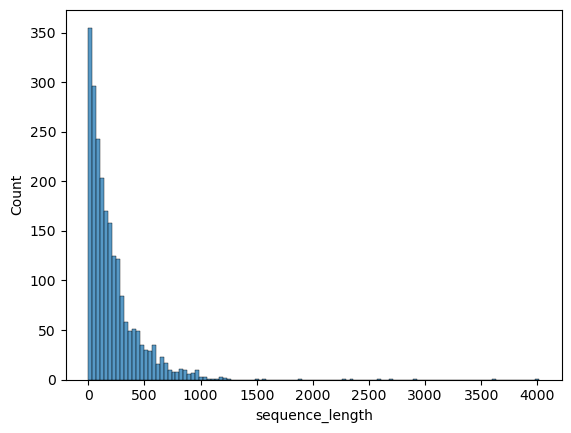

In [41]:
df_ml = df_ml.copy()
df_ml['sequence_length'] = df_ml['review'].map( lambda x: len(x.split(" ")))
ax = sns.histplot(df_ml['sequence_length'])

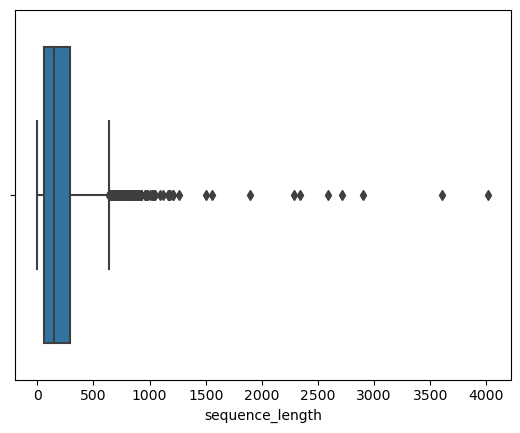

In [42]:
ax = sns.boxplot(data=df_ml, x='sequence_length')

In [43]:
# Get just the text from ds_train
ds_texts = train_ds.map(lambda x, y: x)

# Preview the text
# ds_texts.take(1).get_single_element()

In [45]:
SEQUENCE_LENGTH = 600
# Create text Vectorization layer
sequence_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH
)
sequence_vectorizer.adapt(ds_texts)
VOCAB_SIZE = sequence_vectorizer.vocabulary_size()
VOCAB_SIZE


23920

In [46]:
# raise Exception("Update code below to use only what is shown on the LP")

#### LSTM

In [57]:
# Define a function for building an LSTM model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Sequential

# @tf.function
def build_lstm_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    lstm_model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )

    # Add *new* LSTM layer
    lstm_model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
    lstm_model.add(layers.Dropout(0.5))
    lstm_model.add(layers.Bidirectional(layers.LSTM(128)))#, return_sequences=True)))
    # lstm_model.add(layers.GlobalMaxPooling1D())

    # Add output layer
    lstm_model.add(layers.Dense(len(classes), activation="softmax"))

    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    lstm_model.compile(
        optimizer=optimizer,  #'adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    lstm_model.summary()
    return lstm_model

In [58]:
# # Code below is from CNN Week
# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor, verbose=True)
#     return [early_stop]


### Call backs
# @tf.function
def get_callbacks(monitor='val_accuracy',patience=3, restore_best_weights=True,
                  start_from_epoch=0,baseline_value=None,
                  verbose_early_stopping=1,  
                  tensborboard=True, logdir="/tmp/tb_logs",
                 tb_embed_freq=0, tb_write_images = False, tb_hist_freq = 0):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, #mode=mode, 
                                                      restore_best_weights=restore_best_weights,
                                                      baseline=baseline_value,
                                                      start_from_epoch=start_from_epoch,
                                                      verbose=verbose_early_stopping)

    if tensborboard:
        tboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=tb_hist_freq,write_images=tb_write_images,
                                                embeddings_freq=tb_embed_freq,)
        return [ early_stopping, tboard]
    else:
        return [early_stopping]

In [59]:
EMBED_DIM = 100
classes = y_train.unique()
# Build the lstm model and specify the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = lstm_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 600)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 600, 100)          2392000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 600, 256)         234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 600, 256)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                      

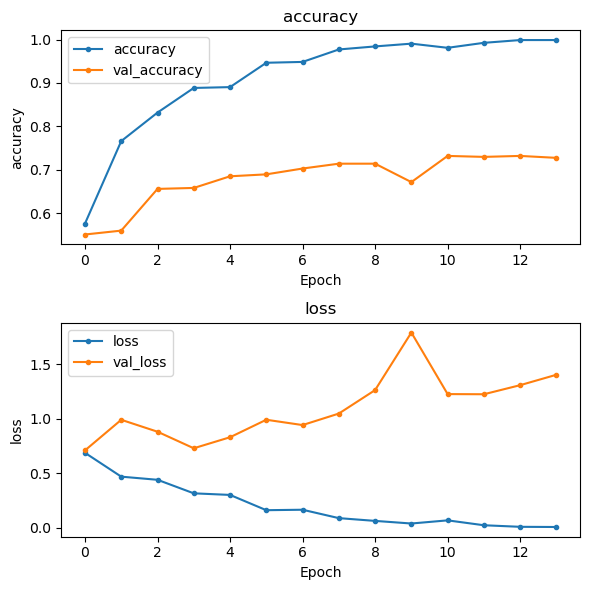


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       1.00      0.99      0.99       809

    accuracy                           0.99      1570
   macro avg       0.99      0.99      0.99      1570
weighted avg       0.99      0.99      0.99      1570



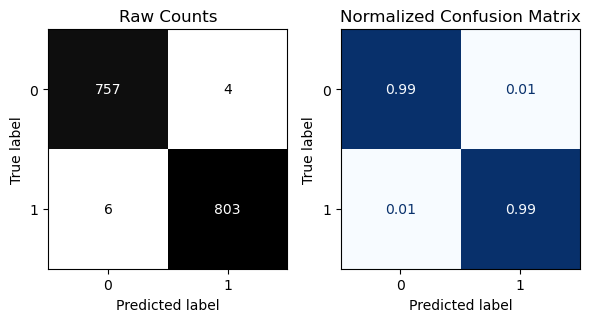


- Evaluating Training Data:
50/50 [==============================] - 33s 666ms/step - loss: 0.0214 - accuracy: 0.9936
{'loss': 0.021419502794742584, 'accuracy': 0.993630588054657}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       119
           1       0.66      0.78      0.72       106

    accuracy                           0.71       225
   macro avg       0.71      0.71      0.71       225
weighted avg       0.72      0.71      0.71       225



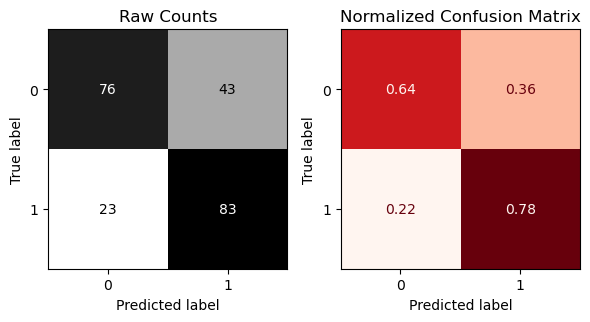


- Evaluating Test Data:
8/8 [==============================] - 5s 579ms/step - loss: 1.4443 - accuracy: 0.7067
{'loss': 1.4443105459213257, 'accuracy': 0.7066666483879089}


In [60]:
# Obtain the results
results = fn.evaluate_classification_network(
    lstm_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

#### Saving Model 1

In [61]:
# Saving model in tf format 
fname_model_lstm = "Models/keras/lstm/" # Filename is a folder for save_format='tf'
lstm_model.save(fname_model_lstm, save_format='tf')

INFO:tensorflow:Assets written to: Models/keras/lstm/assets


INFO:tensorflow:Assets written to: Models/keras/lstm/assets


In [64]:
## Loading the Model
loaded_network = tf.keras.models.load_model(fname_model_lstm)
loaded_network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 600)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 600, 100)          2392000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 600, 256)         234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 600, 256)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                      

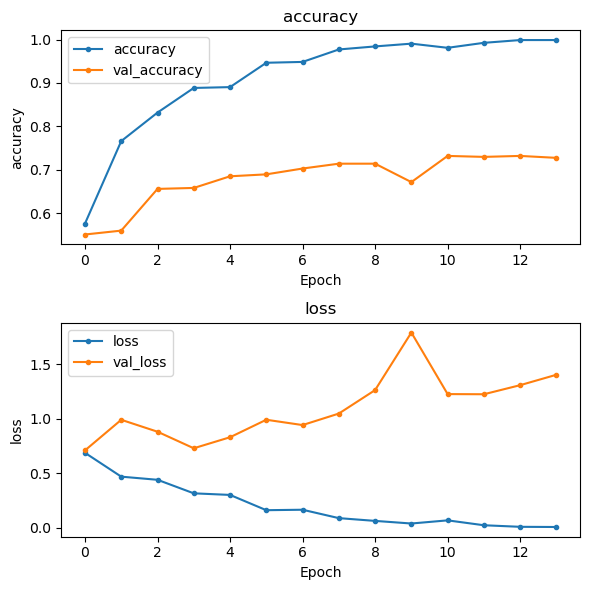


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       1.00      0.99      0.99       809

    accuracy                           0.99      1570
   macro avg       0.99      0.99      0.99      1570
weighted avg       0.99      0.99      0.99      1570



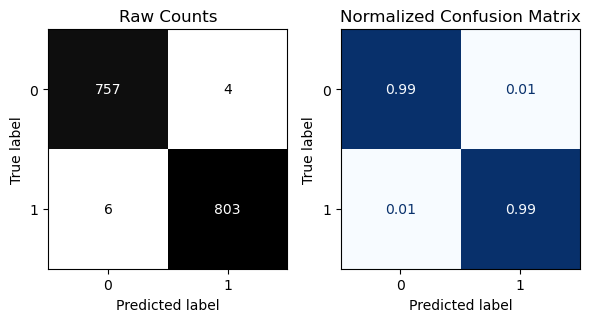


- Evaluating Training Data:
50/50 [==============================] - 14s 278ms/step - loss: 0.0214 - accuracy: 0.9936
{'loss': 0.021419502794742584, 'accuracy': 0.993630588054657}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       119
           1       0.66      0.78      0.72       106

    accuracy                           0.71       225
   macro avg       0.71      0.71      0.71       225
weighted avg       0.72      0.71      0.71       225



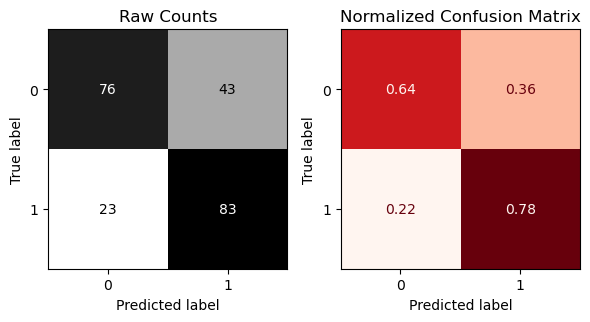


- Evaluating Test Data:
8/8 [==============================] - 2s 252ms/step - loss: 1.4443 - accuracy: 0.7067
{'loss': 1.4443105459213257, 'accuracy': 0.7066666483879089}


In [65]:
# Obtain the results
results = fn.evaluate_classification_network(
    loaded_network, X_train=train_ds, 
    X_test=test_ds, history=history
);

## Testing Saving/Loading Dataset Objects

### RNN Model 2

In [ ]:
def build_gru_model_bi_pool(text_vectorization_layer):
    
    gru_model_bi_pool = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=MAX_TOKENS,
                      output_dim=EMBED_DIM,
                      input_length=SEQUENCE_LENGTH)])
        
    # Add bidirectional component to GRU layer 
    gru_model_bi_pool.add(layers.Bidirectional(layers.GRU(128, return_sequences = True)))
    
    # Add a pooling layer *new
    gru_model_bi_pool.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    gru_model_bi_pool.add(layers.Dense(len(classes), activation='softmax'))
                     
    optimizer = optimizers.legacy.Adam()
    gru_model_bi_pool.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    gru_model_bi_pool.summary()
    return gru_model_bi_pool

In [ ]:
EMBED_DIM = 100
classes = y_train.unique()
MAX_TOKENS = sequence_vectorizer.vocabulary_size()
# Build the lstm model and specify the vectorizer
bidirection_model = build_gru_model_bi_pool(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = bidirection_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

# Obtain the results
results = fn.evaluate_classification_network(
    bidirection_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

### Saving Tensorflow Datasets and Best Model